## Param Init

In [9]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_selection import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, MinimalFCParameters, settings
import pandas as pd

## PCA For Pandas Dataframe Funktion

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


class PCAForPandas(PCA):
    """This class is just a small wrapper around the PCA estimator of sklearn including normalization to make it 
    compatible with pandas DataFrames.
    """

    def __init__(self, **kwargs):
        self._z_scaler = StandardScaler()
        super(self.__class__, self).__init__(**kwargs)

        self._X_columns = None

    def fit(self, X, y=None):
        """Normalize X and call the fit method of the base class with numpy arrays instead of pandas data frames."""

        X = self._prepare(X)

        self._z_scaler.fit(X.values, y)
        z_data = self._z_scaler.transform(X.values, y)

        return super(self.__class__, self).fit(z_data, y)

    def fit_transform(self, X, y=None):
        """Call the fit and the transform method of this class."""

        X = self._prepare(X)

        self.fit(X, y)
        return self.transform(X, y)

    def transform(self, X, y=None):
        """Normalize X and call the transform method of the base class with numpy arrays instead of pandas data frames."""

        X = self._prepare(X)

        z_data = self._z_scaler.transform(X.values, y)

        transformed_ndarray = super(self.__class__, self).transform(z_data)

        pandas_df = pd.DataFrame(transformed_ndarray)
        pandas_df.columns = ["pca_{}".format(i) for i in range(len(pandas_df.columns))]

        return pandas_df

    def _prepare(self, X):
        """Check if the data is a pandas DataFrame and sorts the column names.

        :raise AttributeError: if pandas is not a DataFrame or the columns of the new X is not compatible with the 
                               columns from the previous X data
        """
        if not isinstance(X, pd.DataFrame):
            raise AttributeError("X is not a pandas DataFrame")

        X.sort_index(axis=1, inplace=True)

        if self._X_columns is not None:
            if self._X_columns != list(X.columns):
                raise AttributeError("The columns of the new X is not compatible with the columns from the previous X data")
        else:
            self._X_columns = list(X.columns)

        return X

In [10]:
df_train = pd.read_csv(r'C:\Users\srfzx\Downloads\ECG5000\ECG50002_TRAIN.csv', nrows=50000)
df_test = pd.read_csv(r'C:\Users\srfzx\Downloads\ECG5000\ECG5000_TEST.csv', nrows=50000)
y_train =df_train.target
y_test = df_test.target

In [3]:
df_train = df_train.T

In [92]:
df_train = df_train.drop(['target'],axis=1)

KeyError: "['target'] not found in axis"

In [4]:
df_test = df_test.drop(['target'],axis=1)

In [5]:
df_train = df_train.drop(['id'],axis=1)

KeyError: "['id'] not found in axis"

In [6]:
df_train = df_train.T

In [7]:
df_train = df_train.T

In [8]:
df_train['id'] = 0

In [12]:
k= 0
for i in range(0,len(df_train)):
    k = k+1
    df_train.id.iloc[i]= k

C:\Users\srfzx\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
X_train = extract_features(df_train,column_id="id",default_fc_parameters=MinimalFCParameters(),
                           impute_function=impute)

Feature Extraction: 100%|██████████████████████| 10/10 [00:12<00:00,  1.02it/s]


In [20]:
X_test = extract_features(df_test, column_id='id', default_fc_parameters=MinimalFCParameters(),
                           impute_function=impute)

Feature Extraction: 100%|██████████████████████| 10/10 [01:53<00:00,  9.34s/it]


In [21]:
y_train.index = X_train.index

In [22]:
X_train.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            491, 492, 493, 494, 495, 496, 497, 498, 499, 500],
           dtype='int64', name='id', length=500)

In [11]:
X_train_filtered = select_features(X_train, y_train)
X_train_filtered.tail()

variable,att5__sum_values,att5__maximum,att5__mean,att5__median,att5__minimum,att135__sum_values,att135__minimum,att135__median,att135__maximum,att135__mean,...,att111__maximum,att111__mean,att111__median,att111__minimum,att111__sum_values,att7__minimum,att7__sum_values,att7__maximum,att7__mean,att7__median
id,,,,,,,,,,,,,,,,,,,,,
496,-3.559732,-3.559732,-3.559732,-3.559732,-3.559732,2.507175,2.507175,2.507175,2.507175,2.507175,...,0.556965,0.556965,0.556965,0.556965,0.556965,-2.989770,-2.989770,-2.989770,-2.989770,-2.989770
497,-3.176351,-3.176351,-3.176351,-3.176351,-3.176351,-2.460243,-2.460243,-2.460243,-2.460243,-2.460243,...,0.628264,0.628264,0.628264,0.628264,0.628264,-2.369679,-2.369679,-2.369679,-2.369679,-2.369679
498,-3.122156,-3.122156,-3.122156,-3.122156,-3.122156,2.630759,2.630759,2.630759,2.630759,2.630759,...,0.672925,0.672925,0.672925,0.672925,0.672925,-3.392982,-3.392982,-3.392982,-3.392982,-3.392982
499,-3.650608,-3.650608,-3.650608,-3.650608,-3.650608,-0.071967,-0.071967,-0.071967,-0.071967,-0.071967,...,-0.572767,-0.572767,-0.572767,-0.572767,-0.572767,-2.231601,-2.231601,-2.231601,-2.231601,-2.231601
500,-3.312442,-3.312442,-3.312442,-3.312442,-3.312442,-1.487946,-1.487946,-1.487946,-1.487946,-1.487946,...,-0.141754,-0.141754,-0.141754,-0.141754,-0.141754,-1.354939,-1.354939,-1.354939,-1.354939,-1.354939


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf = DecisionTreeClassifier(criterion='gini', random_state=0)

In [35]:
model = clf.fit(X_train,y_train)

In [ ]:
model2 = clf.fit(X_train,y_train)

In [26]:
model3 = clf.fit(X_test,y_test)

In [ ]:
model3 = clf.fit(X_test,y_test)

In [49]:
model4 = clf.fit(X_test_filtered,y_test)

In [36]:
predict4 = model.predict(X_test)

## genauso gleich mit selection

In [39]:
print(classification_report(y_test,predict4,labels=[1, 2, 3,4,5]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2627
           2       1.00      1.00      1.00      1590
           3       1.00      1.00      1.00        86
           4       0.92      0.95      0.94       175
           5       0.47      0.36      0.41        22

    accuracy                           0.99      4500
   macro avg       0.88      0.86      0.87      4500
weighted avg       0.99      0.99      0.99      4500



In [59]:
from sklearn.metrics import confusion_matrix

In [64]:
import matplotlib as plt
import seaborn as sns

In [41]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Class 1 ", "Class 2", "Class 3", "Class 4", "Class 5"]

Using TensorFlow backend.


In [43]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 20, 10

RANDOM_SEED = 42
LABELS = ["1", "2", "3", "4", "5"]

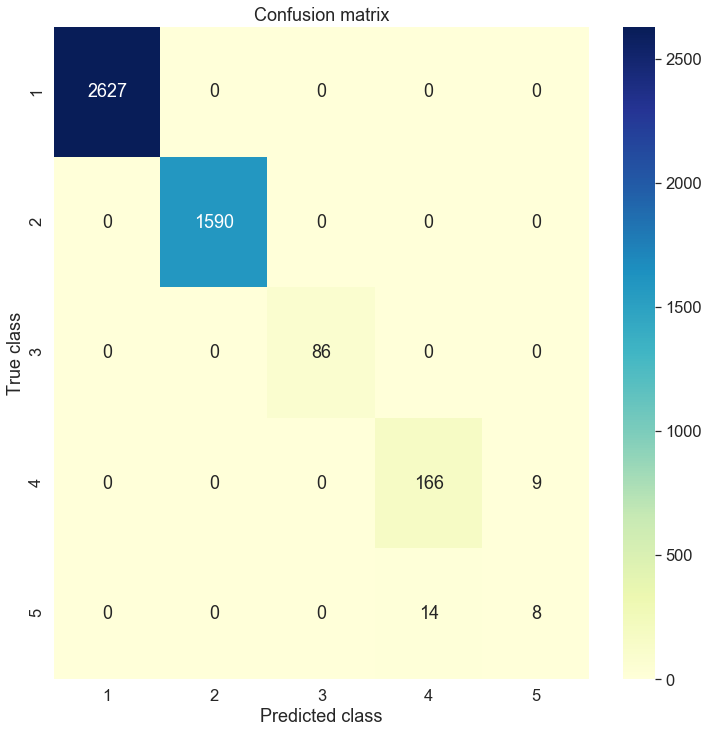

<Figure size 1440x720 with 0 Axes>

In [45]:
plt.figure(figsize=(12, 12))
conf_matrix = confusion_matrix(y_test,predict4)
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="YlGnBu");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
plt.savefig("foo5.pdf", bbox_inches='tight')

In [47]:
from sklearn.metrics import classification_report
#print(classification_report(y_val, predict2))
from sklearn.metrics import classification_report 
#print(classification_report(y_test, predict))
report = classification_report(y_test, predict4, output_dict=True)

In [48]:
df = pd.DataFrame(report).transpose()

In [50]:
df.to_latex('mytable.tex')

In [41]:
predict3 = model.predict(X_train)

## Results

In [42]:
print(classification_report(y_train,predict3,labels=[1, 2, 3,4,5]))

              precision    recall  f1-score   support

           1       0.99      0.97      0.98       292
           2       0.90      0.88      0.89       177
           3       0.55      0.60      0.57        10
           4       0.25      0.37      0.30        19
           5       0.00      0.00      0.00         2

    accuracy                           0.91       500
   macro avg       0.54      0.56      0.55       500
weighted avg       0.92      0.91      0.91       500



In [26]:
predict = model.predict(X_test_filtered)

In [35]:
predict2 = model.predict(X_test)

## RESULTS 

In [39]:
print(classification_report(y_test,predict2,labels=[1, 2, 3,4,5]))

              precision    recall  f1-score   support

           1       0.95      0.98      0.96      2627
           2       0.90      0.86      0.88      1590
           3       0.45      0.38      0.41        86
           4       0.32      0.34      0.33       175
           5       0.07      0.05      0.06        22

    accuracy                           0.89      4500
   macro avg       0.54      0.52      0.53      4500
weighted avg       0.89      0.89      0.89      4500



In [30]:
from sklearn.metrics import classification_report

##  RESULTS ARE HERE 

In [29]:
print(classification_report(y_test,predict,labels=[1, 2, 3,4,5]))

              precision    recall  f1-score   support

           1       0.61      0.01      0.03      2627
           2       0.20      0.00      0.00      1590
           3       0.02      0.93      0.04        86
           4       0.33      0.01      0.02       175
           5       0.00      0.00      0.00        22

    accuracy                           0.03      4500
   macro avg       0.23      0.19      0.02      4500
weighted avg       0.44      0.03      0.02      4500



In [59]:
pca_train = PCAForPandas(n_components=4)
X_train_pca = pca_train.fit_transform(X_train_filtered)

# add index plus 1 to keep original index from robot example
X_train_pca.index += 1

X_train_pca.tail()

,pca_0,pca_1,pca_2,pca_3
496,7.406687,-33.197737,19.628609,-1.440140
497,4.824365,-9.058164,-5.281570,3.253795
498,9.005369,-34.597835,21.249922,-1.185125
499,-4.381112,23.568010,-19.634295,1.955418
500,8.483566,2.311242,-15.552567,-5.184412


## extract from Test Features

In [21]:
X_test_filtered = extract_features(df_test, column_id='id',
                                   kind_to_fc_parameters=settings.from_columns(X_train_filtered.columns),
                                   impute_function=impute)

Feature Extraction: 100%|██████████████████████| 10/10 [01:32<00:00,  8.18s/it]


In [22]:
X_test_filtered

variable,att100__maximum,att100__mean,att100__median,att100__minimum,att100__sum_values,att101__maximum,att101__mean,att101__median,att101__minimum,att101__sum_values,...,att99__maximum,att99__mean,att99__median,att99__minimum,att99__sum_values,att9__maximum,att9__mean,att9__median,att9__minimum,att9__sum_values
id,,,,,,,,,,,,,,,,,,,,,
1,0.615958,0.615958,0.615958,0.615958,0.615958,0.815496,0.815496,0.815496,0.815496,0.815496,...,0.341017,0.341017,0.341017,0.341017,0.341017,-0.632322,-0.632322,-0.632322,-0.632322,-0.632322
2,0.781382,0.781382,0.781382,0.781382,0.781382,1.066590,1.066590,1.066590,1.066590,1.066590,...,0.612552,0.612552,0.612552,0.612552,0.612552,-0.779861,-0.779861,-0.779861,-0.779861,-0.779861
3,0.487491,0.487491,0.487491,0.487491,0.487491,0.443230,0.443230,0.443230,0.443230,0.443230,...,0.467840,0.467840,0.467840,0.467840,0.467840,-1.980754,-1.980754,-1.980754,-1.980754,-1.980754
4,1.533293,1.533293,1.533293,1.533293,1.533293,1.602372,1.602372,1.602372,1.602372,1.602372,...,1.012911,1.012911,1.012911,1.012911,1.012911,-1.588554,-1.588554,-1.588554,-1.588554,-1.588554
5,1.147429,1.147429,1.147429,1.147429,1.147429,1.372542,1.372542,1.372542,1.372542,1.372542,...,0.946335,0.946335,0.946335,0.946335,0.946335,-1.071705,-1.071705,-1.071705,-1.071705,-1.071705
6,0.333211,0.333211,0.333211,0.333211,0.333211,0.402934,0.402934,0.402934,0.402934,0.402934,...,0.272147,0.272147,0.272147,0.272147,0.272147,-1.798465,-1.798465,-1.798465,-1.798465,-1.798465
7,1.547777,1.547777,1.547777,1.547777,1.547777,1.722178,1.722178,1.722178,1.722178,1.722178,...,1.134211,1.134211,1.134211,1.134211,1.134211,-1.089045,-1.089045,-1.089045,-1.089045,-1.089045
8,0.937884,0.937884,0.937884,0.937884,0.937884,1.110339,1.110339,1.110339,1.110339,1.110339,...,0.744361,0.744361,0.744361,0.744361,0.744361,-0.706937,-0.706937,-0.706937,-0.706937,-0.706937
9,1.866055,1.866055,1.866055,1.866055,1.866055,1.983170,1.983170,1.983170,1.983170,1.983170,...,1.675543,1.675543,1.675543,1.675543,1.675543,-1.055027,-1.055027,-1.055027,-1.055027,-1.055027


In [63]:
pca_test = PCAForPandas(n_components=4)
X_test_pca = pca_train.fit_transform(X_test_filtered)

X_test_pca.index += 1

X_test_pca.tail()

,pca_0,pca_1,pca_2,pca_3
4496,8.683318,1.810961,-5.453562,3.125874
4497,0.990012,23.840028,9.942399,-0.716481
4498,15.016687,-2.160190,-7.035103,-0.001182
4499,21.089207,-8.986353,-4.126631,-2.331227
4500,10.188639,37.489124,15.827639,-7.055889
